In [2]:
import trimesh
import pyrender
import numpy as np
import matplotlib.pyplot as plt

obj_path ="/media/Ext_4T_SSD/ASHOK_PART2/smplify-x/data_folder/output_folder/meshes/lady_standing/000.obj"
mesh = trimesh.load(obj_path)

mesh = pyrender.Mesh.from_trimesh(mesh)

scene = pyrender.Scene()
scene.add(mesh)

# pyrender.Viewer(scene, use_raymond_lighting=True)

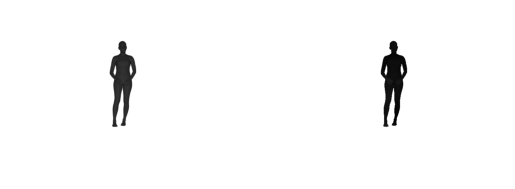

In [3]:
# add camera, lights
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
camera_pose = np.eye(4)
camera_pose[:3, 3] = np.array([0, 0, 3])
scene.add(camera, pose=camera_pose)
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                            innerConeAngle=np.pi/16.0)
scene.add(light, pose=camera_pose)

# render
r = pyrender.OffscreenRenderer(640, 480)
color, depth = r.render(scene)
plt.figure()
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(color)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(depth, cmap=plt.cm.gray_r)
plt.show()



In [ ]:

# import trimesh

# out_mesh = trimesh.Trimesh(vertices, body_model.faces, process=False)
# rot = trimesh.transformations.rotation_matrix(
#     np.radians(180), [1, 0, 0])
# out_mesh.apply_transform(rot) # why this transformation
# out_mesh.export(mesh_fn)

# if visualize:
# import pyrender

# material = pyrender.MetallicRoughnessMaterial(
#     metallicFactor=0.0,
#     alphaMode='OPAQUE',
#     baseColorFactor=(1.0, 1.0, 0.9, 1.0))
# mesh = pyrender.Mesh.from_trimesh(
#     out_mesh,
#     material=material)

# scene = pyrender.Scene(bg_color=[0.0, 0.0, 0.0, 0.0],
#                         ambient_light=(0.3, 0.3, 0.3))
# scene.add(mesh, 'mesh')

# camera_center = camera.center.detach().cpu().numpy().squeeze()
# camera_transl = camera.translation.detach().cpu().numpy().squeeze()
# # Equivalent to 180 degrees around the y-axis. Transforms the fit to
# # OpenGL compatible coordinate system.
# camera_transl[0] *= -1.0

# camera_pose = np.eye(4)
# camera_pose[:3, 3] = camera_transl

# camera = pyrender.camera.IntrinsicsCamera(
#     fx=focal_length, fy=focal_length,
#     cx=camera_center[0], cy=camera_center[1])
# scene.add(camera, pose=camera_pose) 

# # Get the lights from the viewer
# light_nodes = monitor.mv.viewer._create_raymond_lights()
# for node in light_nodes:
#     scene.add_node(node)

# r = pyrender.OffscreenRenderer(viewport_width=W,
#                                 viewport_height=H,
#                                 point_size=1.0)
# color, _ = r.render(scene, flags=pyrender.RenderFlags.RGBA)
# color = color.astype(np.float32) / 255.0

# valid_mask = (color[:, :, -1] > 0)[:, :, np.newaxis]
# input_img = img.detach().cpu().numpy()
# output_img = (color[:, :, :-1] * valid_mask +
#                 (1 - valid_mask) * input_img)

# img = pil_img.fromarray((output_img * 255).astype(np.uint8))
# img.save(out_img_fn)

# #store all the values that are neede for the visualization
# vis_vals = {'focal_length': focal_length,
#             'camera_center': camera_center,
#             'camera_pose': camera_pose,
#             'W': W,
#             'H': H
#             }
# #store the values in a pickle file
# vis_fn = osp.splitext(out_img_fn)[0] + '_vis_values.pkl'
# with open(vis_fn, 'wb') as vis_file:
#     pickle.dump(vis_vals, vis_file, protocol=2)
    

In [ ]:
import pickle

def render_mesh(vis_values_pkl, mesh ):
    #load the values from the pickle file
    with open(vis_values_pkl, 'rb') as vis_file:
        vis_vals = pickle.load(vis_file)
    #create a pyrender scene
    scene = pyrender.Scene(bg_color=[0.0, 0.0, 0.0, 0.0],
                            ambient_light=(0.3, 0.3, 0.3))
    #create a pyrender mesh
    material = pyrender.MetallicRoughnessMaterial(
        metallicFactor=0.0,
        alphaMode='OPAQUE',
        baseColorFactor=(1.0, 1.0, 0.9, 1.0))
    mesh = pyrender.Mesh.from_trimesh(
        mesh,
        material=material)
    scene.add(mesh, 'mesh')
    #create a pyrender camera
    camera = pyrender.camera.IntrinsicsCamera(
        fx=vis_vals['focal_length'], fy=vis_vals['focal_length'],
        cx=vis_vals['camera_center'][0], cy=vis_vals['camera_center'][1])
    scene.add(camera, pose=vis_vals['camera_pose'])
    #create a pyrender light
    light = pyrender.PointLight(color=[1.0, 1.0, 1.0], intensity=1.0)
    scene.add(light, pose=vis_vals['camera_pose'])
    #create a pyrender renderer
    r = pyrender.OffscreenRenderer(vis_vals['W'], vis_vals['H'])
    color, _ = r.render(scene, flags=pyrender.RenderFlags.RGBA)
    color = color.astype(np.float32) / 255.0
    return color


